# Feature Extraction

1) Time and frequency domain

2) Mean, median, standard deviation, peak values

3) Absolute integral

4) Power ratio of the frequency bands 0-2.75Hz and 0-5Hz

5) Peak frequency of the power spectral density (PSD)

6) Spectral entropy of the normalized PSD

7) Take synchronized data from the three IMUs: Mean, standard deviation, absolute integral and energy are calculated on 3 axes of each of the IMUs pairwise

8) Heart rate: features (normalized) mean and gradient. (Note: Normalization is done on the interval defined by resting and maximum HR)

9) And more...

In [1]:
import dataprocess as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Prepare samples

In [2]:
# Load all protocol subjects
colName=dp.exportColName()
data=dp.loadAllSubjects()

In [3]:
# Remove actID=0 and acc6g and orientation data
effectiveData=dp.removeAct0(data)
effectiveData=dp.removeAcc6gOri(effectiveData)

In [4]:
# Fill NaN by linear interpolation
noNaNData=dp.interpolateNaN(effectiveData, method='linear')

In [5]:
# Remove heads and tails of all activities from all subjects:
actDict=dp.throwAllHeadsAndTails(noNaNData, dt=10)

In [6]:
# Cut all spectra into 1-sec-long segments:
dataDict=dp.chopAllSpectra(actDict, duration=5.12, withT=True)

Checking discontinuity Count...
actID=1,	 count=0/1724
actID=2,	 count=0/1652
actID=3,	 count=0/1700
actID=17,	 count=0/2186
actID=16,	 count=0/1553
actID=12,	 count=0/773
actID=13,	 count=0/624
actID=4,	 count=0/2187
actID=7,	 count=0/1704
actID=6,	 count=0/1471
actID=5,	 count=0/831
actID=24,	 count=0/364


In [7]:
print('Total segment counts =', sum([dataDict[a].shape[0] for a in list(actDict.keys())]))

Total segment counts = 16769


**Note: Now we have 16769 spectrum segments from 9 protocol subjects: **

1) Each have 33 columns (31 features + actID + timestamp) and 512 rows (5.12 sec long).

2) Each segment is from the a single subject (don't have two spectra from two subjects merged into one).

3) Each segment belongs to one activity (a spectrum segment won't be at transition between two activities).

**We can view a segment as the following:**

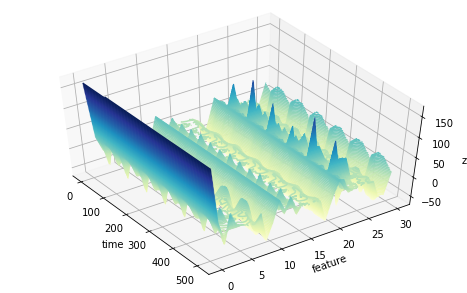

In [15]:
# Show a segment (the no.101 data of actID=5) (without showing timestamp and actID in the contour)
dp.showContour(dataDict[5][100][:, 2:])

## Feature Extraction: Time domain

Help with tsfresh package.

In [8]:
import tsfresh.feature_extraction.feature_calculators as ft_cal

C:\Users\Elite840G2\Anaconda3\envs\ds100\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
# 1. Create a dictionary to store the feature data for actID=5
# 2. Transform segment data format into tsfresh-compatible format:
act5DFlist=[]
for i in range(len(dataDict[5])):
    act5DFlist.append(dp.toTsfreshFormat(dataDict[5][i]))

act17DFlist=[]
for i in range(len(dataDict[5])):
    act17DFlist.append(dp.toTsfreshFormat(dataDict[17][i]))

In [10]:
act17DFlist[25].head()

,activityID,timestamp,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,...,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
0,17.0,893.05,100.0,33.25,-2.89722,2.83408,7.41520,0.135691,1.16435,0.780773,...,33.8125,9.77243,-1.048260,-0.179584,-0.123134,0.111788,-0.060290,-61.6433,-16.2675,38.2781
1,17.0,893.06,100.0,33.25,-2.92323,2.23137,7.87869,0.202494,1.17050,0.689092,...,33.8125,9.81975,-1.051390,0.168227,-0.087035,0.117513,-0.015241,-61.2066,-15.7248,37.7852
2,17.0,893.07,100.0,33.25,-2.81066,2.11668,7.88076,0.193440,1.13596,0.595943,...,33.8125,9.81245,-0.973201,-0.102460,-0.139783,0.069501,-0.044188,-60.9853,-15.9435,37.0384
3,17.0,893.08,100.0,33.25,-2.71690,2.42364,8.34298,0.239003,1.10288,0.550348,...,33.8125,9.66356,-1.238670,-0.025161,-0.083829,0.139882,-0.038654,-62.0948,-16.2468,37.9107
4,17.0,893.09,100.0,33.25,-2.46290,3.26191,8.95975,0.290973,1.01048,0.442759,...,33.8125,9.69698,-1.161690,-0.179654,-0.023806,0.045921,-0.037802,-61.9775,-16.6905,37.7812


### 1) Mean and median

In [11]:
hand_acc16g_x_mean5 = np.array([ft_cal.mean(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median5 = np.array([ft_cal.median(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy5 = np.array([ft_cal.abs_energy(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max5 = np.array([ft_cal.maximum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min5 = np.array([ft_cal.minimum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std5 = np.array([ft_cal.standard_deviation(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_mean17 = np.array([ft_cal.mean(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_median17 = np.array([ft_cal.median(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_absEnergy17 = np.array([ft_cal.abs_energy(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_max17 = np.array([ft_cal.maximum(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_min17 = np.array([ft_cal.minimum(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_std17 = np.array([ft_cal.standard_deviation(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])

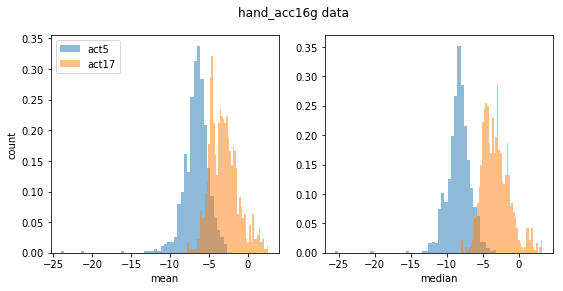

In [12]:
plt.figure(figsize=[9, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(121)
plt.hist(hand_acc16g_x_mean5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_mean17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
plt.subplot(122)
plt.hist(hand_acc16g_x_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median');

**Note1: Here are the histogram of three different features (mean, median, abs_energy). I'm comparing the distribution of these features between different activities (actID=5(running) and 17(ironing)). If we can tell the activities apart by looking at these distribution, then that feature could be a good feature to involve in developing a classifier. **

**Note2: Mean and median are both good features (though I like the median better because it is in a nicer single mode, and the two bunches (maybe) seperate further than the mean). **

### 2) standard deviation, peak values

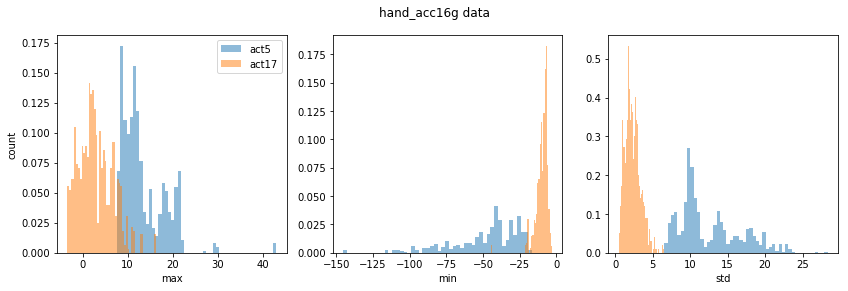

In [13]:
plt.figure(figsize=[14, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(131)
plt.hist(hand_acc16g_x_max5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_max17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('max')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_min5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_min17, bins=50, alpha=0.5, normed=True)
plt.xlabel('min')
plt.subplot(133)
plt.hist(hand_acc16g_x_std5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_std17, bins=50, alpha=0.5, normed=True)
plt.xlabel('std');

**Note: max and min distributions actually match the result of std distribution. The absolute values of min and max of act17 are both smaller than act5 might suggest act17 has smaller standard deviation. We may only include std or (min, max) into the model.**

### 3) Variance, absolute_energy, absolute_sum_of_changes

In [14]:
hand_acc16g_x_variance5 = np.array([ft_cal.variance(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absSumOfChange5 = np.array([ft_cal.absolute_sum_of_changes(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_variance17 = np.array([ft_cal.variance(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_absSumOfChange17 = np.array([ft_cal.absolute_sum_of_changes(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])

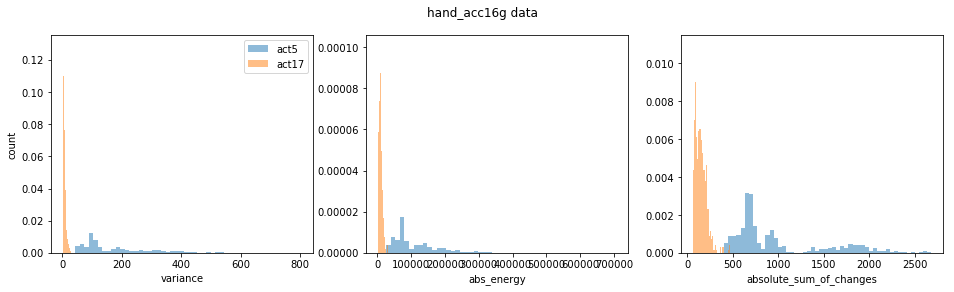

In [15]:
plt.figure(figsize=[16, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(131)
plt.hist(hand_acc16g_x_variance5, bins=50, label='act5', alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_variance17, bins=50, label='act17', alpha=0.5, normed=True)
plt.xlabel('variance')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_absEnergy5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_absEnergy17, bins=50, alpha=0.5, normed=True)
plt.xlabel('abs_energy')
plt.subplot(133)
plt.hist(hand_acc16g_x_absSumOfChange5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_absSumOfChange17, bins=50, alpha=0.5, normed=True)
plt.xlabel('absolute_sum_of_changes');

**Note1: The distribution of variance matches that of std (and this is what we would expect), so we can just pick one of them.**

**Note2: abs_energy: $E=\sum_{i=1}^n {x_i}^2$; absolute_sum_of_change: $\sum_{i=1}^{n-1} \vert x_{i+1}-x_i\vert$**


### 4) count_above_mean, skewness, kurtosis

In [16]:
hand_acc16g_x_cntAbove5 = np.array([ft_cal.count_above_mean(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_skewness5 = np.array([ft_cal.skewness(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_kurtosis5 = np.array([ft_cal.kurtosis(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_skewness17 = np.array([ft_cal.skewness(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_kurtosis17 = np.array([ft_cal.kurtosis(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])
hand_acc16g_x_cntAbove17 = np.array([ft_cal.count_above_mean(act17DFlist[i].hand_acc16g_x) for i in range(len(act17DFlist))])

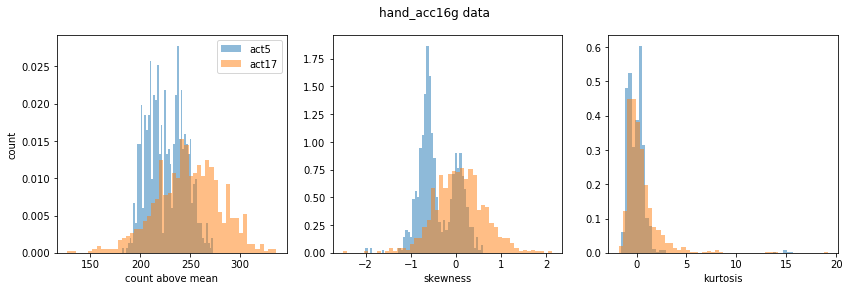

In [17]:
plt.figure(figsize=[14, 4])
plt.suptitle('hand_acc16g data')
plt.subplot(131)
plt.hist(hand_acc16g_x_cntAbove5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_cntAbove17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('count above mean')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_skewness5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_skewness17, bins=50, alpha=0.5, normed=True)
plt.xlabel('skewness')
plt.subplot(133)
plt.hist(hand_acc16g_x_kurtosis5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_x_kurtosis17, bins=50, alpha=0.5, normed=True)
plt.xlabel('kurtosis');

**Note1: count_above_mean: number of data point in a spectrum with value larger than its mean.**

**Note2: count_above_mean and kurtosis features have distributions overlap too much between different activities. From skewness histogram, it seems that act17 has a pretty good normal distribution center at zero, while act5 can some time skew to the right but more offen skew left. Would this be a useful feature??**

### 5) Pairwise comparison between axes: mean/median ratio/product/sum

In [18]:
hand_acc16g_y_mean5 = np.array([ft_cal.mean(act5DFlist[i].hand_acc16g_y) for i in range(len(act5DFlist))])
hand_acc16g_z_mean5 = np.array([ft_cal.mean(act5DFlist[i].hand_acc16g_z) for i in range(len(act5DFlist))])

hand_acc16g_y_mean17 = np.array([ft_cal.mean(act17DFlist[i].hand_acc16g_y) for i in range(len(act17DFlist))])
hand_acc16g_z_mean17 = np.array([ft_cal.mean(act17DFlist[i].hand_acc16g_z) for i in range(len(act17DFlist))])

In [19]:
hand_acc16g_xy_meanR5 = hand_acc16g_x_mean5/hand_acc16g_y_mean5
hand_acc16g_yz_meanR5 = hand_acc16g_y_mean5/hand_acc16g_z_mean5
hand_acc16g_zx_meanR5 = hand_acc16g_z_mean5/hand_acc16g_x_mean5

hand_acc16g_xy_meanR17 = hand_acc16g_x_mean17/hand_acc16g_y_mean17
hand_acc16g_yz_meanR17 = hand_acc16g_y_mean17/hand_acc16g_z_mean17
hand_acc16g_zx_meanR17 = hand_acc16g_z_mean17/hand_acc16g_x_mean17

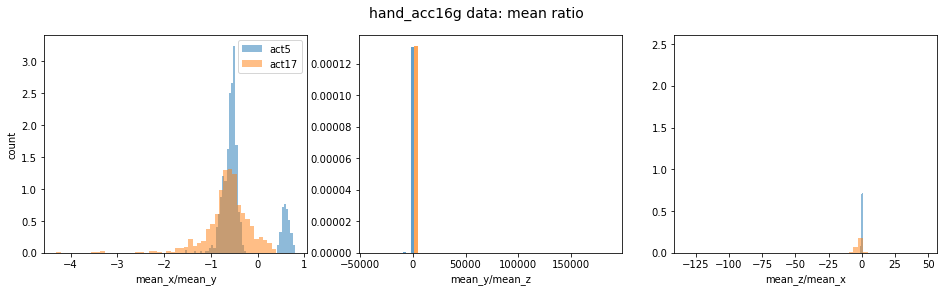

In [20]:
plt.figure(figsize=[16, 4])
plt.suptitle('hand_acc16g data: mean ratio', fontsize=14)
plt.subplot(131)
plt.hist(hand_acc16g_xy_meanR5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_xy_meanR17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('mean_x/mean_y')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist([hand_acc16g_yz_meanR5, hand_acc16g_yz_meanR17], bins=30, alpha=0.7, normed=True)
plt.xlabel('mean_y/mean_z')
plt.subplot(133)
plt.hist(hand_acc16g_zx_meanR5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_zx_meanR17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_z/mean_x');

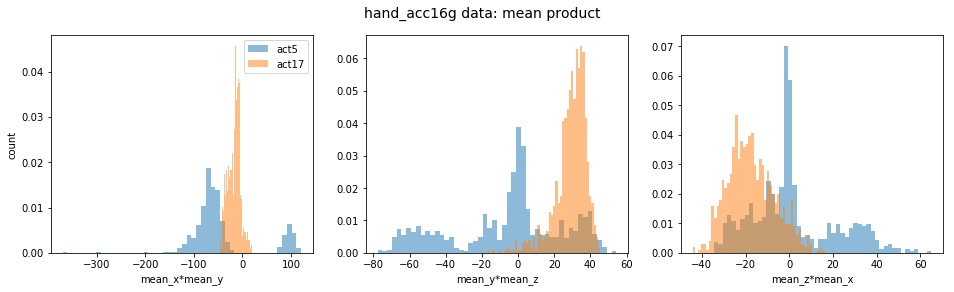

In [21]:
plt.figure(figsize=[16, 4])
plt.suptitle('hand_acc16g data: mean product', fontsize=14)
plt.subplot(131)
plt.hist(hand_acc16g_x_mean5*hand_acc16g_y_mean5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_mean17*hand_acc16g_y_mean17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('mean_x*mean_y')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_y_mean5*hand_acc16g_z_mean5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_y_mean17*hand_acc16g_z_mean17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_y*mean_z')
plt.subplot(133)
plt.hist(hand_acc16g_z_mean5*hand_acc16g_x_mean5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_mean17*hand_acc16g_x_mean17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_z*mean_x');

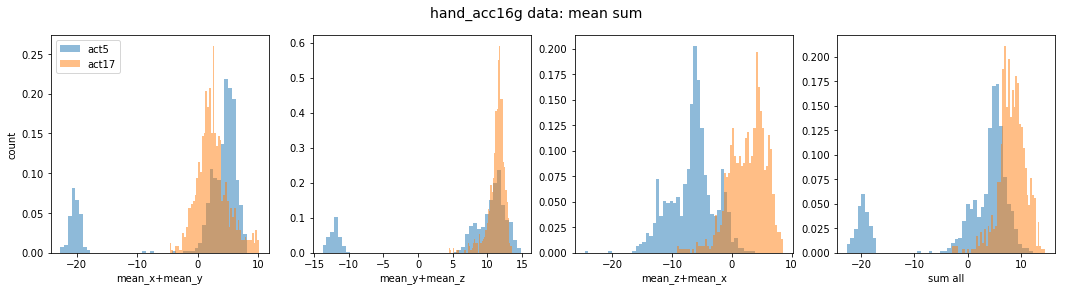

In [22]:
plt.figure(figsize=[18, 4])
plt.suptitle('hand_acc16g data: mean sum', fontsize=14)
plt.subplot(141)
plt.hist(hand_acc16g_x_mean5+hand_acc16g_y_mean5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_mean17+hand_acc16g_y_mean17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('mean_x+mean_y')
plt.ylabel('count')
plt.legend()
plt.subplot(142)
plt.hist(hand_acc16g_y_mean5+hand_acc16g_z_mean5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_y_mean17+hand_acc16g_z_mean17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_y+mean_z')
plt.subplot(143)
plt.hist(hand_acc16g_z_mean5+hand_acc16g_x_mean5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_mean17+hand_acc16g_x_mean17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_z+mean_x')
plt.subplot(144)
plt.hist(hand_acc16g_z_mean5+hand_acc16g_x_mean5+hand_acc16g_y_mean5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_mean17+hand_acc16g_x_mean17+hand_acc16g_y_mean17, bins=50, alpha=0.5, normed=True)
plt.xlabel('sum all');

In [23]:
hand_acc16g_y_median5 = np.array([ft_cal.median(act5DFlist[i].hand_acc16g_y) for i in range(len(act5DFlist))])
hand_acc16g_z_median5 = np.array([ft_cal.median(act5DFlist[i].hand_acc16g_z) for i in range(len(act5DFlist))])

hand_acc16g_y_median17 = np.array([ft_cal.median(act17DFlist[i].hand_acc16g_y) for i in range(len(act17DFlist))])
hand_acc16g_z_median17 = np.array([ft_cal.median(act17DFlist[i].hand_acc16g_z) for i in range(len(act17DFlist))])

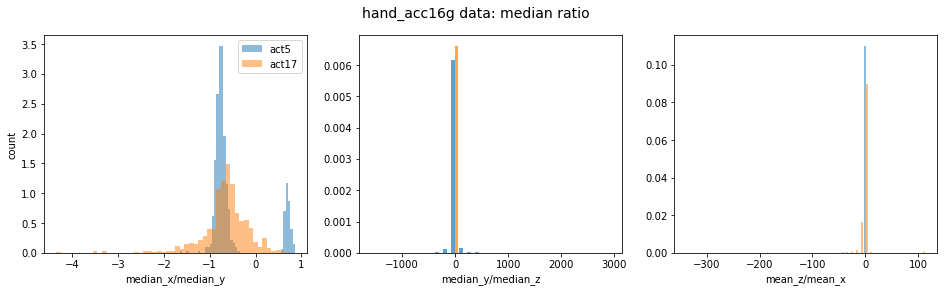

In [24]:
plt.figure(figsize=[16, 4])
plt.suptitle('hand_acc16g data: median ratio', fontsize=14)
plt.subplot(131)
plt.hist(hand_acc16g_x_median5/hand_acc16g_y_mean5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_median17/hand_acc16g_y_mean17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('median_x/median_y')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist([hand_acc16g_y_median5/hand_acc16g_z_median5, hand_acc16g_y_median17/hand_acc16g_z_median17], bins=30, alpha=0.7, normed=True)
plt.xlabel('median_y/median_z')
plt.subplot(133)
plt.hist([hand_acc16g_z_median5/hand_acc16g_x_median5, hand_acc16g_z_median17/hand_acc16g_x_median17], bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_z/mean_x');

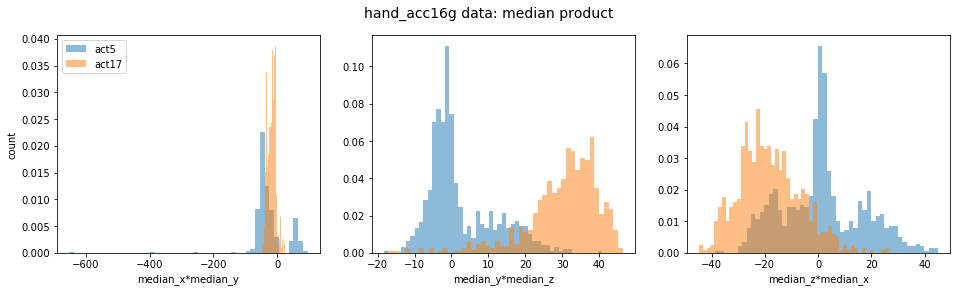

In [25]:
plt.figure(figsize=[16, 4])
plt.suptitle('hand_acc16g data: median product', fontsize=14)
plt.subplot(131)
plt.hist(hand_acc16g_x_median5*hand_acc16g_y_median5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_median17*hand_acc16g_y_median17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('median_x*median_y')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_y_median5*hand_acc16g_z_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_y_median17*hand_acc16g_z_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median_y*median_z')
plt.subplot(133)
plt.hist(hand_acc16g_z_median5*hand_acc16g_x_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_median17*hand_acc16g_x_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median_z*median_x');

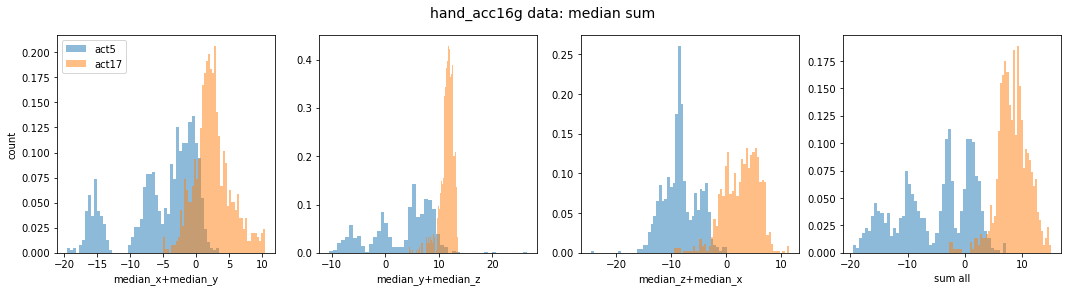

In [26]:
plt.figure(figsize=[18, 4])
plt.suptitle('hand_acc16g data: median sum', fontsize=14)
plt.subplot(141)
plt.hist(hand_acc16g_x_median5+hand_acc16g_y_median5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_median17+hand_acc16g_y_median17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('median_x+median_y')
plt.ylabel('count')
plt.legend()
plt.subplot(142)
plt.hist(hand_acc16g_y_median5+hand_acc16g_z_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_y_median17+hand_acc16g_z_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median_y+median_z')
plt.subplot(143)
plt.hist(hand_acc16g_z_median5+hand_acc16g_x_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_median17+hand_acc16g_x_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('median_z+median_x')
plt.subplot(144)
plt.hist(hand_acc16g_z_median5+hand_acc16g_x_median5+hand_acc16g_y_median5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_median17+hand_acc16g_x_median17+hand_acc16g_y_median17, bins=50, alpha=0.5, normed=True)
plt.xlabel('sum all');

### 6) Pairwise Comparison between Features: Mean/std

In [27]:
hand_acc16g_y_std5 = np.array([ft_cal.standard_deviation(act5DFlist[i].hand_acc16g_y) for i in range(len(act5DFlist))])
hand_acc16g_z_std5 = np.array([ft_cal.standard_deviation(act5DFlist[i].hand_acc16g_z) for i in range(len(act5DFlist))])

hand_acc16g_y_std17 = np.array([ft_cal.standard_deviation(act17DFlist[i].hand_acc16g_y) for i in range(len(act17DFlist))])
hand_acc16g_z_std17 = np.array([ft_cal.standard_deviation(act17DFlist[i].hand_acc16g_z) for i in range(len(act17DFlist))])

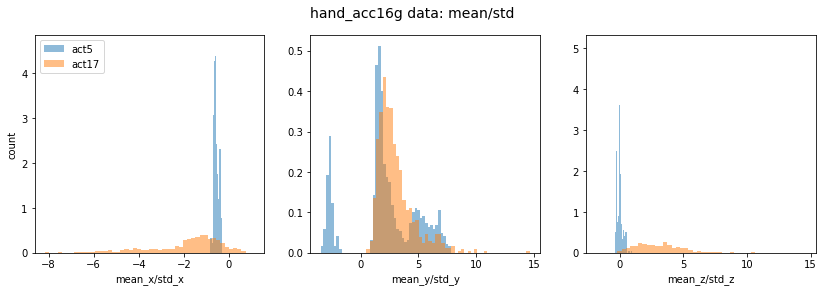

In [28]:
plt.figure(figsize=[14, 4])
plt.suptitle('hand_acc16g data: mean/std', fontsize=14)
plt.subplot(131)
plt.hist(hand_acc16g_x_mean5/hand_acc16g_x_std5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(hand_acc16g_x_mean17/hand_acc16g_x_std17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('mean_x/std_x')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_y_mean5/hand_acc16g_z_std5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_y_mean17/hand_acc16g_z_std17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_y/std_y')
plt.subplot(133)
plt.hist(hand_acc16g_z_mean5/hand_acc16g_x_std5, bins=50, alpha=0.5, normed=True)
plt.hist(hand_acc16g_z_mean17/hand_acc16g_x_std17, bins=50, alpha=0.5, normed=True)
plt.xlabel('mean_z/std_z');

**Note1: Too many features can try, but only a few of them are apparently useful.**

**Note2: Maybe just start with calculating mean and std for the 33 IMU recorded data for now, and add some more afterwards.**

## Frequency Domain

In [29]:
import scipy.fftpack

In [206]:
N = 512
dt = 0.01
freq = np.linspace(0.0, 1.0/(2.0*dt), int(N/4))
act5FFT_hand_acc16g_x = []
for i in range(len(act5DFlist)):
    xf = np.abs(scipy.fftpack.fft(np.array(act5DFlist[i].hand_acc16g_x)))[:int(N/4)]
    act5FFT_hand_acc16g_x.append(xf)

In [207]:
act5FFT_chest_gyro_x = []
for i in range(len(act5DFlist)):
    xf = np.abs(scipy.fftpack.fft(np.array(act5DFlist[i].chest_gyro_x)))[:int(N/4)]
    act5FFT_chest_gyro_x.append(xf)

### Compare ordinary and normalized intensity of FFT:

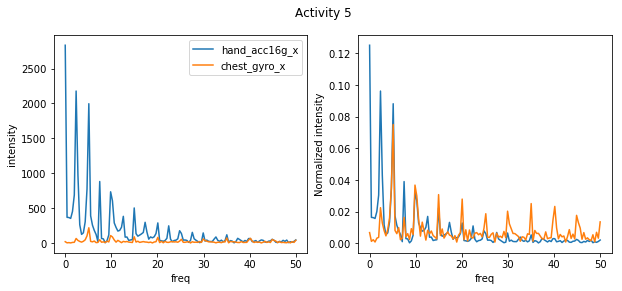

In [208]:
plt.figure(figsize=[10, 4])
plt.suptitle('Activity 5')
plt.subplot(121)
plt.plot(freq[:int(N/4)], act5FFT_hand_acc16g_x[89], label='hand_acc16g_x')
plt.plot(freq[:int(N/4)], act5FFT_chest_gyro_x[89], label='chest_gyro_x')
plt.ylabel('intensity')
plt.xlabel('freq')
plt.legend()
plt.subplot(122)
plt.plot(freq[:int(N/4)], act5FFT_hand_acc16g_x[89]/np.sum(act5FFT_hand_acc16g_x[89]))
plt.plot(freq[:int(N/4)], act5FFT_chest_gyro_x[89]/np.sum(act5FFT_chest_gyro_x[89]))
plt.ylabel('Normalized intensity')
plt.xlabel('freq');

### Do FFT for all segment data:

In [151]:
freqColName=['activityID', 'freq'] + dp.exportEffectiveColName()[3:]

In [169]:
N = 512
dt = 0.01
freq = np.linspace(0.0, 1.0/(2.0*dt), int(N/4))

fftDataDict = {}
for a in dataDict.keys():
    actData = dataDict[a]
    actFFTData = []
    for j in range(len(actData)):
        fftChunk = np.ones(int(N/4))*17
        fftChunk = np.vstack((fftChunk, freq[:int(N/4)]))
        for i in range(30):
            fftChunk = np.vstack((fftChunk, np.abs(scipy.fftpack.fft(np.array(actData[j][:, i+3])))[:int(N/4)]))

        fftChunk = np.array(fftChunk).transpose()
        actFFTData.append(fftChunk)
        
    fftDataDict[a] = np.array(actFFTData)

In [170]:
for a in list(fftDataDict.keys()):
    print('act{} shape={}'.format(a, fftDataDict[a].shape))

act1 shape=(1724, 128, 32)
act2 shape=(1652, 128, 32)
act3 shape=(1700, 128, 32)
act17 shape=(2186, 128, 32)
act16 shape=(1553, 128, 32)
act12 shape=(773, 128, 32)
act13 shape=(624, 128, 32)
act4 shape=(2187, 128, 32)
act7 shape=(1704, 128, 32)
act6 shape=(1471, 128, 32)
act5 shape=(831, 128, 32)
act24 shape=(364, 128, 32)


**Note: The frequency chunk of data have shape=(128, 32) (128 digit long, and 30 features+freq+activityID columns)**

In [177]:
act5FFTlist=[pd.DataFrame(fftDataDict[5][i], columns=freqColName) for i in range(len(fftDataDict[5]))]
act17FFTlist=[pd.DataFrame(fftDataDict[17][i], columns=freqColName) for i in range(len(fftDataDict[17]))]

In [178]:
act17FFTlist[38].head()

,activityID,freq,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,...,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
0,17.0,0.000000,17027.625000,736.866988,3328.653761,2420.386738,29.030288,84.463530,51.742430,5493.988221,...,17312.0,4841.349530,984.531320,1180.793088,0.245325,16.409466,18.030868,26248.482700,509.603516,27528.370000
1,17.0,0.393701,3.548986,800.952793,216.814400,775.121517,73.587885,49.518285,177.069006,6052.929996,...,0.0,22.075145,113.083438,178.338667,15.585834,39.382699,35.081036,796.729283,440.323546,1115.503615
2,17.0,0.787402,3.326665,1005.890247,122.256015,374.913044,101.101402,221.270263,190.999587,9028.278693,...,0.0,19.438387,117.033184,23.848217,22.384138,19.817030,25.779575,163.355961,471.965417,257.536139
3,17.0,1.181102,2.974694,533.879878,500.526282,274.004765,102.356424,74.439273,282.106217,2600.456534,...,0.0,13.328055,82.789934,113.662966,7.501802,32.361827,14.523241,653.217363,430.265946,649.480822
4,17.0,1.574803,2.519170,261.966886,356.745918,166.316610,77.766048,108.205766,102.906927,3881.570709,...,0.0,4.698684,102.126594,67.077931,26.866143,4.969589,33.666184,229.429305,665.686509,218.734338


### 1) Max frequency:

In [216]:
fft_hand_acc16g_x_maxLoc5 = np.array([ft_cal.first_location_of_maximum(act5FFTlist[i].hand_acc16g_x) for i in range(len(act5FFTlist))])
fft_hand_acc16g_z_maxLoc5 = np.array([ft_cal.first_location_of_maximum(act5FFTlist[i].hand_acc16g_z) for i in range(len(act5FFTlist))])

fft_hand_acc16g_x_maxLoc17 = np.array([ft_cal.first_location_of_maximum(act17FFTlist[i].hand_acc16g_x) for i in range(len(act17FFTlist))])
fft_hand_acc16g_z_maxLoc17 = np.array([ft_cal.first_location_of_maximum(act17FFTlist[i].hand_acc16g_z) for i in range(len(act17FFTlist))])

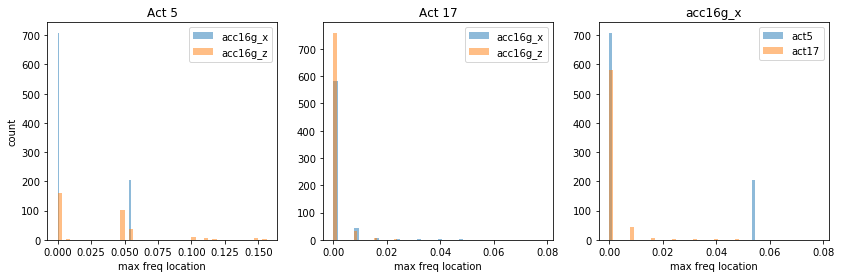

In [217]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
plt.hist(fft_hand_acc16g_x_maxLoc5, bins=50, alpha=0.5, normed=True, label='acc16g_x')
plt.hist(fft_hand_acc16g_z_maxLoc5, bins=50, alpha=0.5, normed=True, label='acc16g_z')
plt.xlabel('max freq location')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_hand_acc16g_x_maxLoc17, bins=50, alpha=0.5, normed=True, label='acc16g_x')
plt.hist(fft_hand_acc16g_z_maxLoc17, bins=50, alpha=0.5, normed=True, label='acc16g_z')
plt.xlabel('max freq location')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_hand_acc16g_x_maxLoc5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_hand_acc16g_x_maxLoc17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('max freq location')
plt.title('acc16g_x')
plt.legend();

In [215]:
fft_chest_gyro_x_maxLoc5 = np.array([ft_cal.first_location_of_maximum(act5FFTlist[i].chest_gyro_x) for i in range(len(act5FFTlist))])
fft_chest_gyro_z_maxLoc5 = np.array([ft_cal.first_location_of_maximum(act5FFTlist[i].chest_gyro_z) for i in range(len(act5FFTlist))])

fft_chest_gyro_x_maxLoc17 = np.array([ft_cal.first_location_of_maximum(act17FFTlist[i].chest_gyro_x) for i in range(len(act17FFTlist))])
fft_chest_gyro_z_maxLoc17 = np.array([ft_cal.first_location_of_maximum(act17FFTlist[i].chest_gyro_z) for i in range(len(act17FFTlist))])

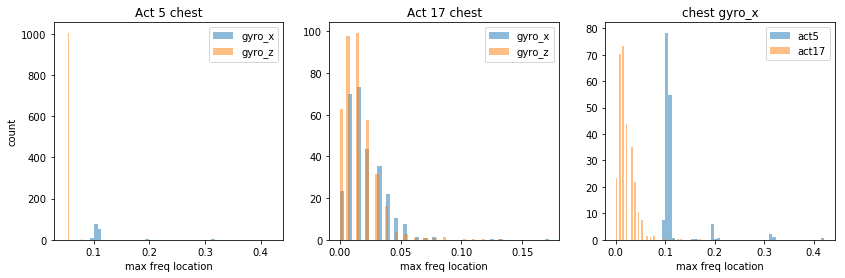

In [218]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
plt.hist(fft_chest_gyro_x_maxLoc5, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_maxLoc5, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('max freq location')
plt.ylabel('count')
plt.title('Act 5 chest')
plt.legend()
plt.subplot(132)
plt.hist(fft_chest_gyro_x_maxLoc17, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_maxLoc17, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('max freq location')
plt.title('Act 17 chest')
plt.legend()
plt.subplot(133)
plt.hist(fft_chest_gyro_x_maxLoc5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_chest_gyro_x_maxLoc17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('max freq location')
plt.title('chest gyro_x')
plt.legend();

### 2) Frequency Spectrum Integral:

In [219]:
fft_hand_acc16g_x_sum5 = np.array([ft_cal.sum_values(act5FFTlist[i].hand_acc16g_x) for i in range(len(act5FFTlist))])
fft_hand_acc16g_z_sum5 = np.array([ft_cal.sum_values(act5FFTlist[i].hand_acc16g_z) for i in range(len(act5FFTlist))])

fft_hand_acc16g_x_sum17 = np.array([ft_cal.sum_values(act17FFTlist[i].hand_acc16g_x) for i in range(len(act17FFTlist))])
fft_hand_acc16g_z_sum17 = np.array([ft_cal.sum_values(act17FFTlist[i].hand_acc16g_z) for i in range(len(act17FFTlist))])

fft_chest_gyro_x_sum5 = np.array([ft_cal.sum_values(act5FFTlist[i].chest_gyro_x) for i in range(len(act5FFTlist))])
fft_chest_gyro_z_sum5 = np.array([ft_cal.sum_values(act5FFTlist[i].chest_gyro_z) for i in range(len(act5FFTlist))])

fft_chest_gyro_x_sum17 = np.array([ft_cal.sum_values(act17FFTlist[i].chest_gyro_x) for i in range(len(act17FFTlist))])
fft_chest_gyro_z_sum17 = np.array([ft_cal.sum_values(act17FFTlist[i].chest_gyro_z) for i in range(len(act17FFTlist))])

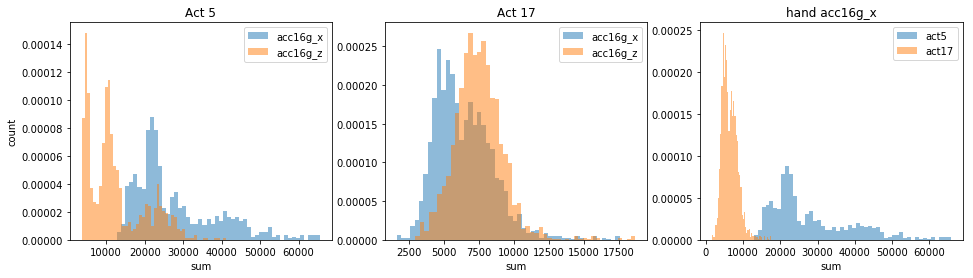

In [220]:
plt.figure(figsize=[16, 4])
plt.subplot(131)
plt.hist(fft_hand_acc16g_x_sum5, bins=50, alpha=0.5, normed=True, label='acc16g_x')
plt.hist(fft_hand_acc16g_z_sum5, bins=50, alpha=0.5, normed=True, label='acc16g_z')
plt.xlabel('sum')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_hand_acc16g_x_sum17, bins=50, alpha=0.5, normed=True, label='acc16g_x')
plt.hist(fft_hand_acc16g_z_sum17, bins=50, alpha=0.5, normed=True, label='acc16g_z')
plt.xlabel('sum')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_hand_acc16g_x_sum5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_hand_acc16g_x_sum17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('sum')
plt.title('hand acc16g_x')
plt.legend();

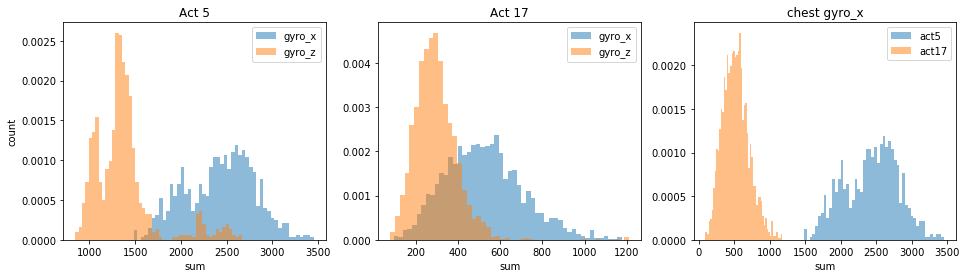

In [199]:
plt.figure(figsize=[16, 4])
plt.subplot(131)
plt.hist(fft_chest_gyro_x_sum5, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_sum5, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('sum')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_chest_gyro_x_sum17, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_sum17, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('sum')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_chest_gyro_x_sum5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_chest_gyro_x_sum17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('sum')
plt.title('chest gyro_x')
plt.legend();

**Note: Taking integral/sum of the frequency spectrum seems much more helpful than simply looking for the location of max freq.**

### 3) Freq Integral Ratio: sum of freq 0~10 / sum of freq 0~20

In [228]:
f1, f2 = 25, 50
fft_hand_acc16g_x_sumRatio5 = np.array([np.sum(act5FFTlist[i].hand_acc16g_x[:f1])/np.sum(act5FFTlist[i].hand_acc16g_x[:f2]) for i in range(len(act5FFTlist))])
fft_hand_acc16g_z_sumRatio5 = np.array([np.sum(act5FFTlist[i].hand_acc16g_z[:f1])/np.sum(act5FFTlist[i].hand_acc16g_z[:f2]) for i in range(len(act5FFTlist))])

fft_hand_acc16g_x_sumRatio17 = np.array([np.sum(act17FFTlist[i].hand_acc16g_x[:f1])/np.sum(act17FFTlist[i].hand_acc16g_x[:f2]) for i in range(len(act17FFTlist))])
fft_hand_acc16g_z_sumRatio17 = np.array([np.sum(act17FFTlist[i].hand_acc16g_z[:f1])/np.sum(act17FFTlist[i].hand_acc16g_z[:f2]) for i in range(len(act17FFTlist))])

fft_chest_gyro_x_sumRatio5 = np.array([np.sum(act5FFTlist[i].chest_gyro_x[:f1])/np.sum(act5FFTlist[i].chest_gyro_x[:f2]) for i in range(len(act5FFTlist))])
fft_chest_gyro_z_sumRatio5 = np.array([np.sum(act5FFTlist[i].chest_gyro_z[:f1])/np.sum(act5FFTlist[i].chest_gyro_z[:f2]) for i in range(len(act5FFTlist))])

fft_chest_gyro_x_sumRatio17 = np.array([np.sum(act17FFTlist[i].chest_gyro_x[:f1])/np.sum(act17FFTlist[i].chest_gyro_x[:f2]) for i in range(len(act17FFTlist))])
fft_chest_gyro_z_sumRatio17 = np.array([np.sum(act17FFTlist[i].chest_gyro_z[:f1])/np.sum(act17FFTlist[i].chest_gyro_z[:f2]) for i in range(len(act17FFTlist))])

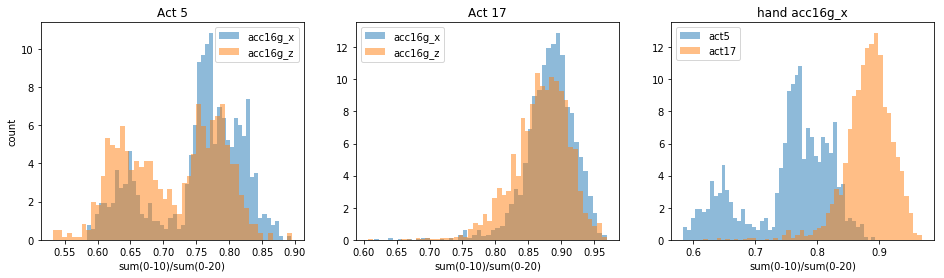

In [229]:
plt.figure(figsize=[16, 4])
plt.subplot(131)
plt.hist(fft_hand_acc16g_x_sumRatio5, bins=50, alpha=0.5, normed=True, label='acc16g_x')
plt.hist(fft_hand_acc16g_z_sumRatio5, bins=50, alpha=0.5, normed=True, label='acc16g_z')
plt.xlabel('sum(0-10)/sum(0-20)')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_hand_acc16g_x_sumRatio17, bins=50, alpha=0.5, normed=True, label='acc16g_x')
plt.hist(fft_hand_acc16g_z_sumRatio17, bins=50, alpha=0.5, normed=True, label='acc16g_z')
plt.xlabel('sum(0-10)/sum(0-20)')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_hand_acc16g_x_sumRatio5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_hand_acc16g_x_sumRatio17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('sum(0-10)/sum(0-20)')
plt.title('hand acc16g_x')
plt.legend();

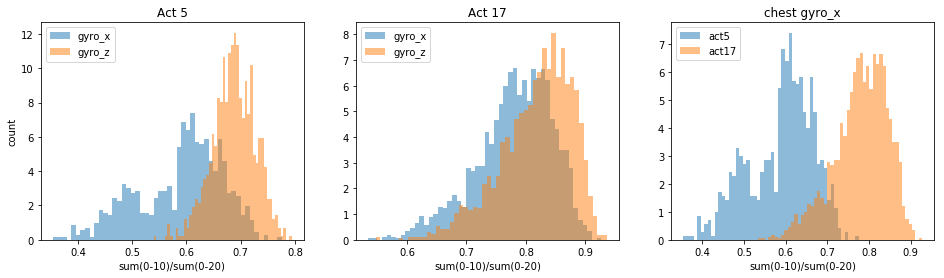

In [230]:
plt.figure(figsize=[16, 4])
plt.subplot(131)
plt.hist(fft_chest_gyro_x_sumRatio5, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_sumRatio5, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('sum(0-10)/sum(0-20)')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_chest_gyro_x_sumRatio17, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_sumRatio17, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('sum(0-10)/sum(0-20)')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_chest_gyro_x_sumRatio5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_chest_gyro_x_sumRatio17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('sum(0-10)/sum(0-20)')
plt.title('chest gyro_x')
plt.legend();

**Note: sum ratio seems to be useful.**

### 4) Power Sum across axis:

Sum over different axis: $x^2 + y^2 + z^2$

In [231]:
fft_hand_acc16g_x_absEnergy5 = np.array([ft_cal.abs_energy(act5FFTlist[i].hand_acc16g_x) for i in range(len(act5FFTlist))])
fft_hand_acc16g_y_absEnergy5 = np.array([ft_cal.abs_energy(act5FFTlist[i].hand_acc16g_y) for i in range(len(act5FFTlist))])
fft_hand_acc16g_z_absEnergy5 = np.array([ft_cal.abs_energy(act5FFTlist[i].hand_acc16g_z) for i in range(len(act5FFTlist))])
ftt_hand_acc16g_absEnergySum5 = fft_hand_acc16g_x_absEnergy5 + fft_hand_acc16g_y_absEnergy5 + fft_hand_acc16g_z_absEnergy5

fft_hand_acc16g_x_absEnergy17 = np.array([ft_cal.abs_energy(act17FFTlist[i].hand_acc16g_x) for i in range(len(act17FFTlist))])
fft_hand_acc16g_y_absEnergy17 = np.array([ft_cal.abs_energy(act17FFTlist[i].hand_acc16g_y) for i in range(len(act17FFTlist))])
fft_hand_acc16g_z_absEnergy17 = np.array([ft_cal.abs_energy(act17FFTlist[i].hand_acc16g_z) for i in range(len(act17FFTlist))])
ftt_hand_acc16g_absEnergySum17 = fft_hand_acc16g_x_absEnergy17 + fft_hand_acc16g_y_absEnergy17 + fft_hand_acc16g_z_absEnergy17

fft_chest_gyro_x_absEnergy5 = np.array([ft_cal.abs_energy(act5FFTlist[i].chest_gyro_x) for i in range(len(act5FFTlist))])
fft_chest_gyro_y_absEnergy5 = np.array([ft_cal.abs_energy(act5FFTlist[i].chest_gyro_y) for i in range(len(act5FFTlist))])
fft_chest_gyro_z_absEnergy5 = np.array([ft_cal.abs_energy(act5FFTlist[i].chest_gyro_z) for i in range(len(act5FFTlist))])
ftt_chest_gyro_absEnergySum5 = fft_chest_gyro_x_absEnergy5 + fft_chest_gyro_y_absEnergy5 + fft_chest_gyro_z_absEnergy5

fft_chest_gyro_x_absEnergy17 = np.array([ft_cal.abs_energy(act17FFTlist[i].chest_gyro_x) for i in range(len(act17FFTlist))])
fft_chest_gyro_y_absEnergy17 = np.array([ft_cal.abs_energy(act17FFTlist[i].chest_gyro_y) for i in range(len(act17FFTlist))])
fft_chest_gyro_z_absEnergy17 = np.array([ft_cal.abs_energy(act17FFTlist[i].chest_gyro_z) for i in range(len(act17FFTlist))])
ftt_chest_gyro_absEnergySum17 = fft_chest_gyro_x_absEnergy17 + fft_chest_gyro_y_absEnergy17 + fft_chest_gyro_z_absEnergy17

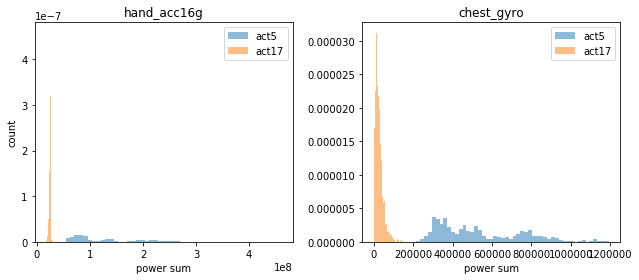

In [234]:
plt.figure(figsize=[9, 4])
plt.subplot(121)
plt.hist(ftt_hand_acc16g_absEnergySum5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(ftt_hand_acc16g_absEnergySum17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('power sum')
plt.ylabel('count')
plt.title('hand_acc16g')
plt.legend()
plt.subplot(122)
plt.hist(ftt_chest_gyro_absEnergySum5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(ftt_chest_gyro_absEnergySum17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('power sum')
plt.title('chest_gyro')
plt.legend()
plt.tight_layout();

**Note: Not sure this is any better than simply take the sum for each direction.**

### 5) Peak number:

In [257]:
n=50
fft_hand_acc16g_x_pkNum5 = np.array([ft_cal.number_cwt_peaks(act5FFTlist[i].hand_acc16g_x, n) for i in range(len(act5FFTlist))])
fft_hand_acc16g_z_pkNum5 = np.array([ft_cal.number_cwt_peaks(act5FFTlist[i].hand_acc16g_z, n) for i in range(len(act5FFTlist))])

fft_hand_acc16g_x_pkNum17 = np.array([ft_cal.number_cwt_peaks(act17FFTlist[i].hand_acc16g_x, n) for i in range(len(act17FFTlist))])
fft_hand_acc16g_z_pkNum17 = np.array([ft_cal.number_cwt_peaks(act17FFTlist[i].hand_acc16g_z, n) for i in range(len(act17FFTlist))])

fft_chest_gyro_x_pkNum5 = np.array([ft_cal.number_cwt_peaks(act5FFTlist[i].chest_gyro_x, n) for i in range(len(act5FFTlist))])
fft_chest_gyro_z_pkNum5 = np.array([ft_cal.number_cwt_peaks(act5FFTlist[i].chest_gyro_z, n) for i in range(len(act5FFTlist))])

fft_chest_gyro_x_pkNum17 = np.array([ft_cal.number_cwt_peaks(act17FFTlist[i].chest_gyro_x, n) for i in range(len(act17FFTlist))])
fft_chest_gyro_z_pkNum17 = np.array([ft_cal.number_cwt_peaks(act17FFTlist[i].chest_gyro_z, n) for i in range(len(act17FFTlist))])

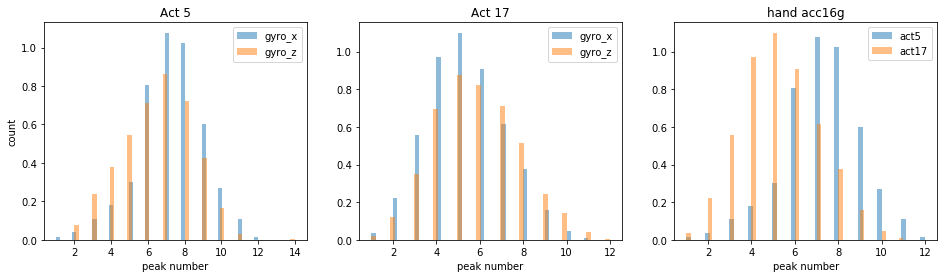

In [258]:
plt.figure(figsize=[16, 4])
plt.subplot(131)
plt.hist(fft_hand_acc16g_x_pkNum5, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_hand_acc16g_z_pkNum5, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('peak number')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_hand_acc16g_x_pkNum17, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_hand_acc16g_z_pkNum17, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('peak number')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_hand_acc16g_x_pkNum5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_hand_acc16g_x_pkNum17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('peak number')
plt.title('hand acc16g')
plt.legend();

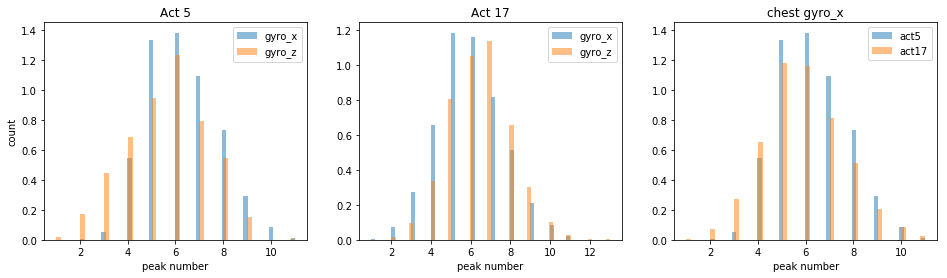

In [259]:
plt.figure(figsize=[16, 4])
plt.subplot(131)
plt.hist(fft_chest_gyro_x_pkNum5, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_pkNum5, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('peak number')
plt.ylabel('count')
plt.title('Act 5')
plt.legend()
plt.subplot(132)
plt.hist(fft_chest_gyro_x_pkNum17, bins=50, alpha=0.5, normed=True, label='gyro_x')
plt.hist(fft_chest_gyro_z_pkNum17, bins=50, alpha=0.5, normed=True, label='gyro_z')
plt.xlabel('peak number')
plt.title('Act 17')
plt.legend()
plt.subplot(133)
plt.hist(fft_chest_gyro_x_pkNum5, bins=50, alpha=0.5, normed=True, label='act5')
plt.hist(fft_chest_gyro_x_pkNum17, bins=50, alpha=0.5, normed=True, label='act17')
plt.xlabel('peak number')
plt.title('chest gyro_x')
plt.legend();